Q2. Steel Industry Energy Consumption Dataset Data Set
### Apply Linear regression on the dataset above to build a model with Energy Consumption as the Target Variable.

### Deliverables:


1.   **Perform EDA first, delete the date column and check for nulls in the data. Also check for cross correlation among attributes. If high cross-correlation present, append new attributes to the data to impact the model with the cross correlation parameters. Keep the cross correlation linear and exclude polynomial attributes. [4 Marks]**

2. **Use the SGD Regressor class with scaling in your model [3 Marks].**

3. **Use repeated k cross fold with 2 repeats and k = 5. [3 Marks]**

4. **Optimize and find the optimal hyperparameters of tolerance and alpha. [3 Marks]**

5. **Use Elastic net regularization and find its optimal parameters for the model. [2 Marks]**

##Importing librabries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

##loading the steel dataset

In [ ]:
steel= pd.read_csv("/content/Steel_industry_data.csv")

steel.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
steel.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


## Exploratory Data Analysis

In [ ]:
steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

##removing date column since it wont contribute to our modelling


In [ ]:
if 'date' in steel.columns:
    steel = steel.drop('date', axis=1)

steel.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


##verifying columns

In [ ]:
steel.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

##checking for missing values

In [ ]:
steel.isna().sum()

,0
Usage_kWh,0
Lagging_Current_Reactive.Power_kVarh,0
Leading_Current_Reactive_Power_kVarh,0
CO2(tCO2),0
Lagging_Current_Power_Factor,0
Leading_Current_Power_Factor,0
NSM,0
WeekStatus,0
Day_of_week,0
Load_Type,0


<Axes: >

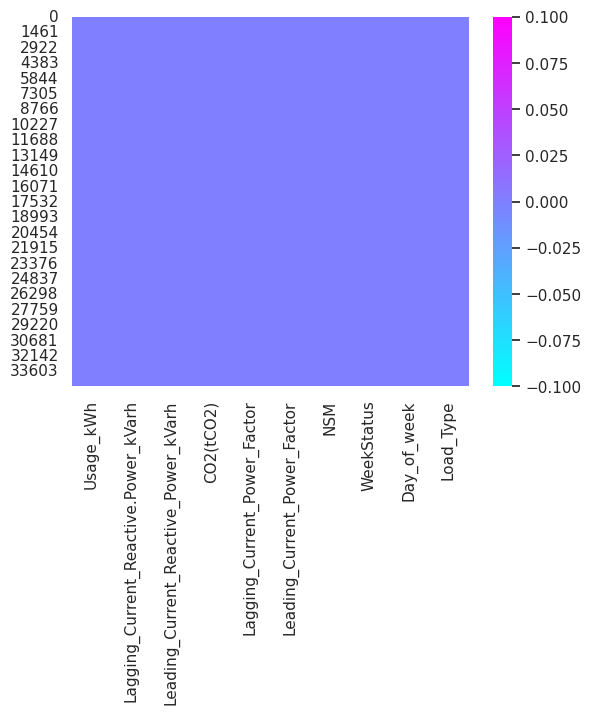

In [ ]:
sns.heatmap(steel.isnull(),cmap='cool')

##From the above no missing value in the dataset

In [ ]:
steel.dtypes

,0
Usage_kWh,float64
Lagging_Current_Reactive.Power_kVarh,float64
Leading_Current_Reactive_Power_kVarh,float64
CO2(tCO2),float64
Lagging_Current_Power_Factor,float64
Leading_Current_Power_Factor,float64
NSM,int64
WeekStatus,object
Day_of_week,object
Load_Type,object


##correlation check

In [ ]:
#selecting only numeric variables for correlation check
steel_data_numeric = steel.select_dtypes(include=[np.number])
steel_data_numeric .corr()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive.Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


##from the correlation check there is highly correlated relationship between some variables which includes:
CO2(tCO2) and Usage_kWh which is 0.988180
CO2(tCO2)  and Lagging_Current_Reactive.Power_kVarh which is 0.886948
Leading_Current_Reactive_Power_kVarh  andLeading_Current_Power_Factor which is -0.944039

Lagging_Current_Reactive.Power_kVarh and Usage_kWh which value is 0.896150


<Axes: >

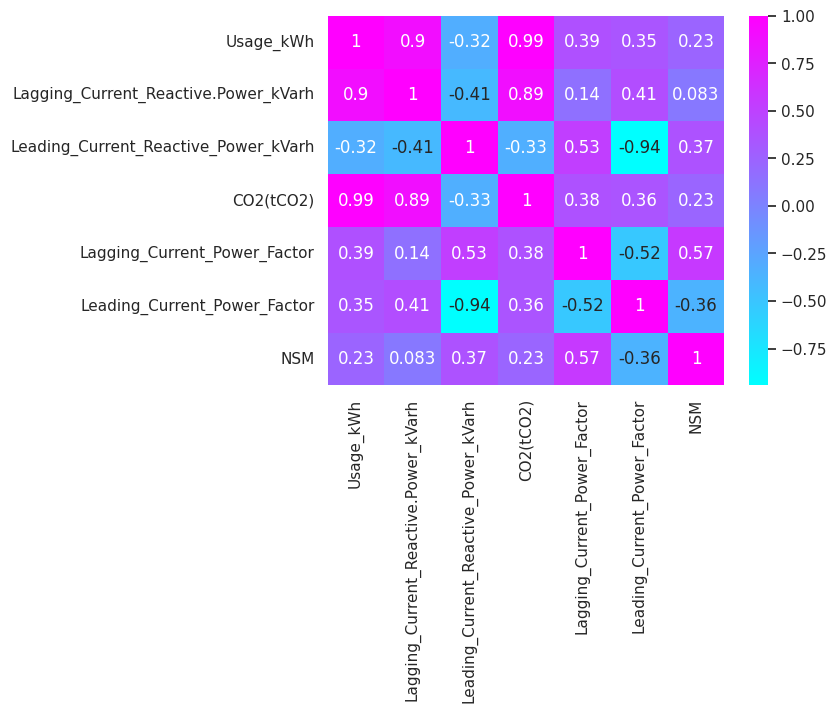

In [ ]:

sns.heatmap(steel_data_numeric.corr(),cmap='cool',annot=True)

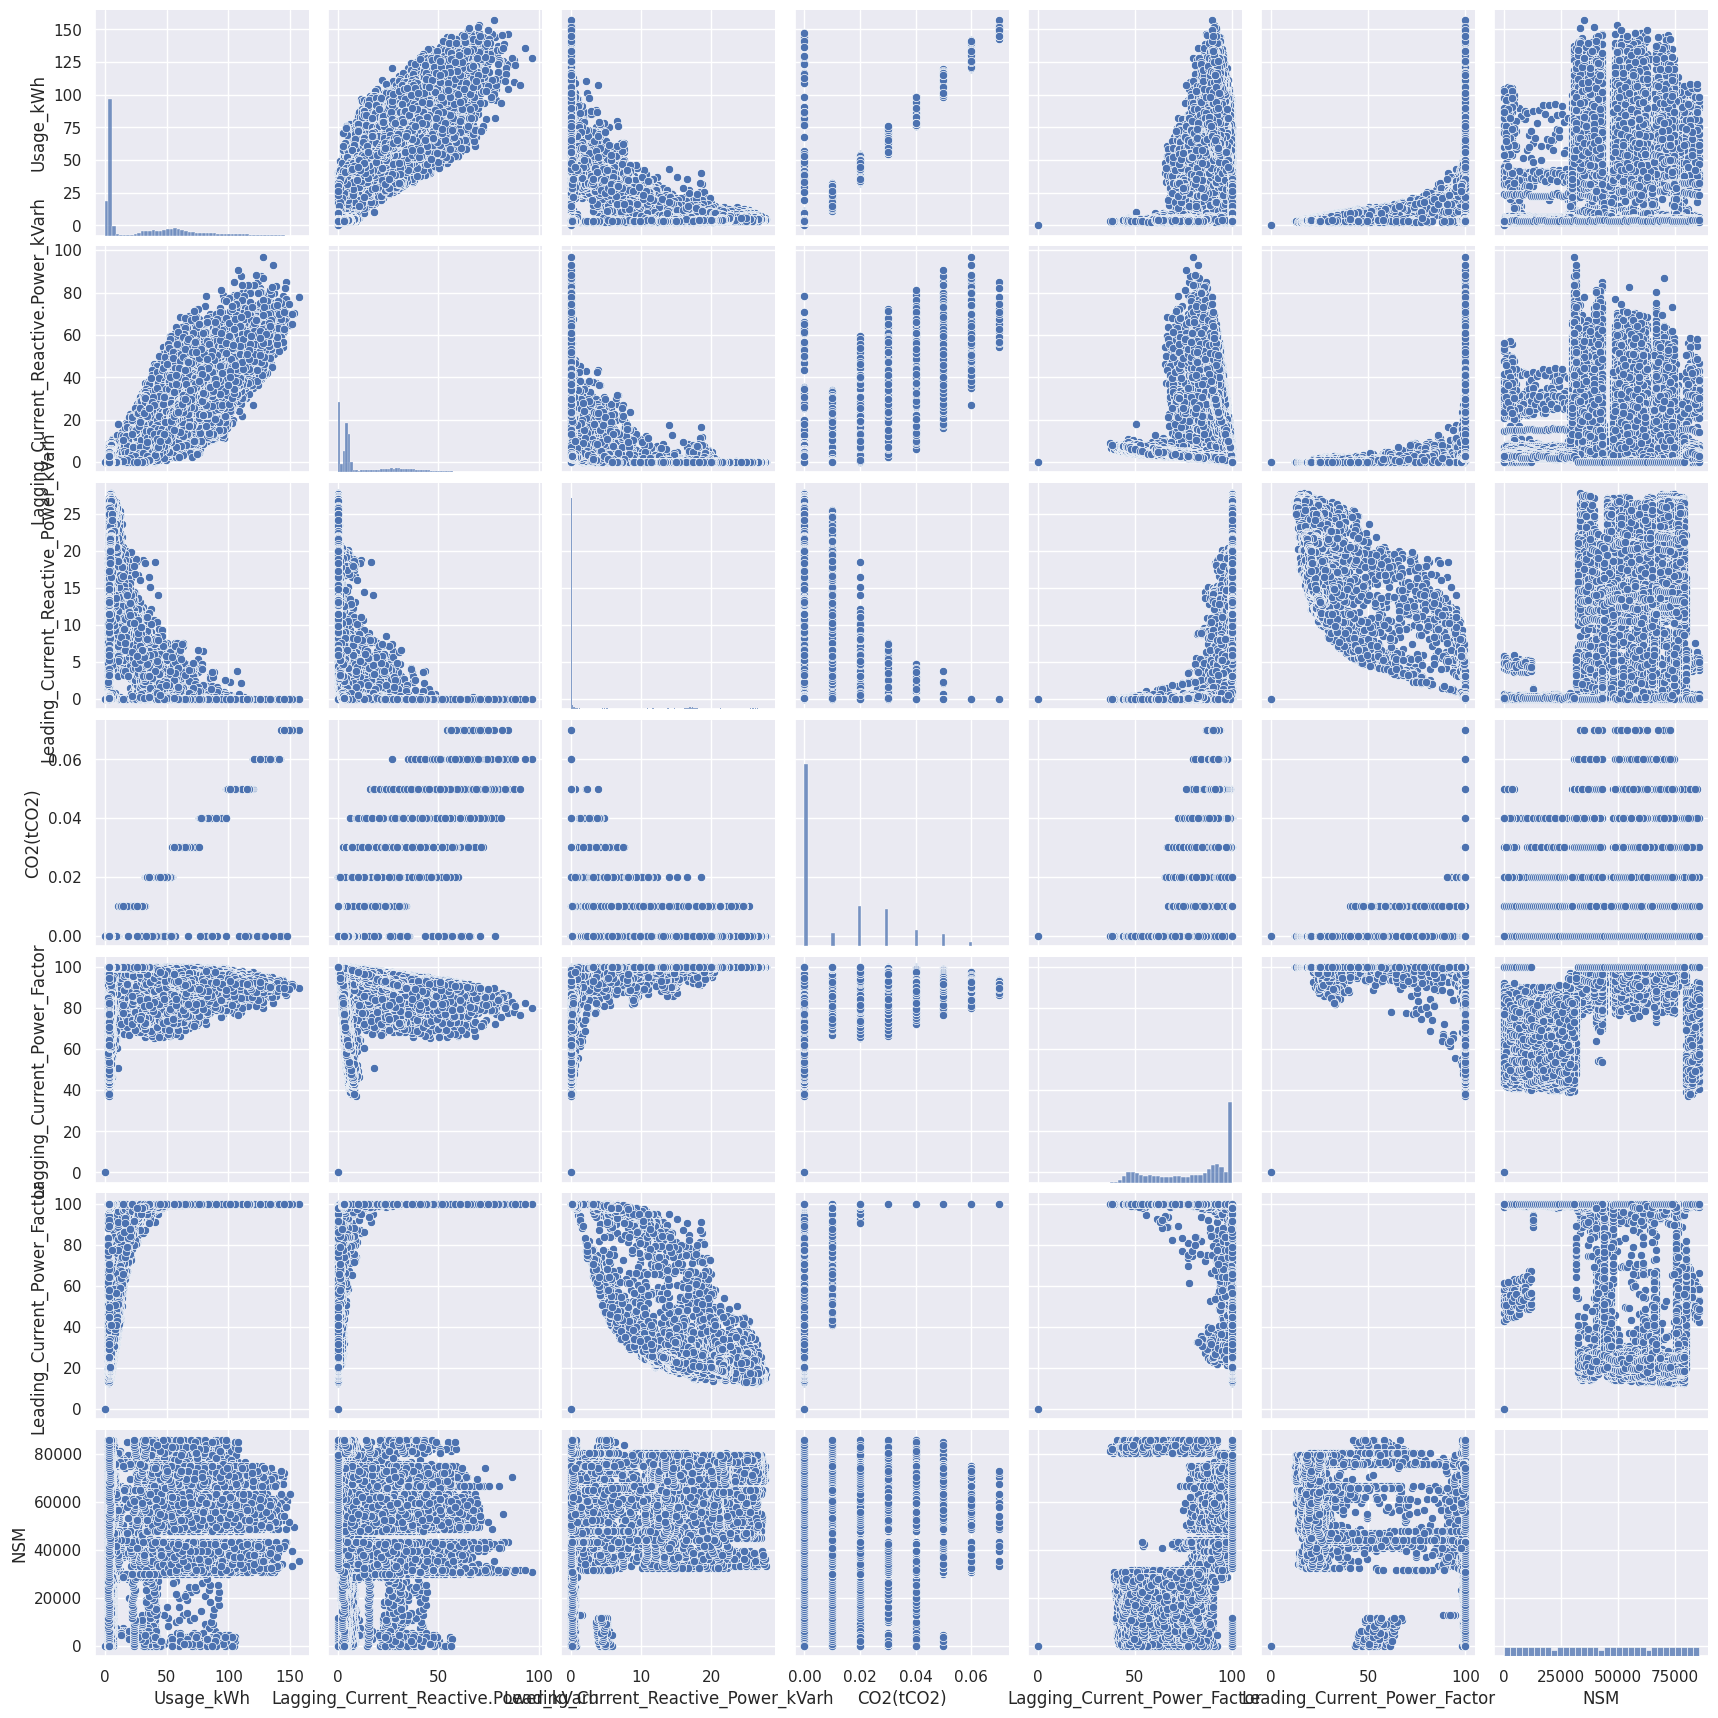

In [ ]:
sns.pairplot(steel)

##Appending new attributes to the data to impact the model with the cross correlation parameters

In [ ]:
#
steel['Usage_CO2_mean'] = (steel['Usage_kWh'] + steel['CO2(tCO2)']) / 2
steel['Reactive_Lag_Power'] = (steel['Lagging_Current_Reactive.Power_kVarh'] + steel['Usage_kWh']) / 2
steel['Leading_Combined_Factor'] = (steel['Leading_Current_Reactive_Power_kVarh'] + steel['Leading_Current_Power_Factor']) / 2



#viewing the head
print(steel.head())


   Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0       3.17                                  2.95   
1       4.00                                  4.46   
2       3.24                                  3.28   
3       3.31                                  3.56   
4       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  360

In [ ]:
steel.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type', 'Usage_CO2_mean',
       'Reactive_Lag_Power', 'Leading_Combined_Factor'],
      dtype='object')

##Target variable

In [ ]:
X = steel.drop('Usage_kWh', axis=1)
y = steel['Usage_kWh']



#### Splitting the dataset into training and testing sets

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 101)


In [ ]:
steel_data_numeric.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'],
      dtype='object')

##Scaling

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



##Using the SGD Regressor class with scaling in the model

In [ ]:

from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

In [ ]:
cv_repeat= RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)

In [ ]:
for penalty in ['l2', 'elasticnet']:
    model = SGDRegressor(penalty=penalty, alpha=0.01, tol=1e-3, random_state=42)

    # Cross-validation scores on the scaled training data
    scores = cross_val_score(model, X_train, y_train, cv=cv_repeat)




    # Fit the model on the scaled training data
    model.fit(X_train, y_train)

    print(f'---- Penalty: {penalty} ----')
    print(f'Scores: {scores}\nMean Score: {np.mean(scores)}\nStd Dev: {np.std(scores)}\n')

    print(f'Model Performance: {model.score(X_test, y_test)}\n')

---- Penalty: l2 ----
Scores: [0.98185655 0.98289017 0.97535281 0.9825951  0.97706974 0.97875438
 0.97868557 0.98244379 0.98060619 0.97967748]
Mean Score: 0.9799931779345854
Std Dev: 0.0024174276179915674

Model Performance: 0.9794666612540431

---- Penalty: elasticnet ----
Scores: [0.98199408 0.98303824 0.97532582 0.98270143 0.9771195  0.97880624
 0.97866986 0.98255252 0.98070599 0.97975921]
Mean Score: 0.9800672911450159
Std Dev: 0.0024672061012101167

Model Performance: 0.9795402147347249



##Mean Scores:

L2: 97.99%
Elastic Net: 98.01%
Model Performance on Test Data: 0.9795402147347249
indicating  the test data, that about 97.95% of the variance explained.

In [ ]:
from sklearn.model_selection import GridSearchCV
model = SGDRegressor(penalty='elasticnet', random_state=42)

# Define the parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'tol': [1e-4, 1e-3, 1e-2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=cv_repeat, scoring='r2',
                           n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


preffered_model = grid_search.best_estimator_


test_score = preffered_model.score(X_test, y_test)
print("Test Set Score of Best Model:", test_score)


Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best Parameters: {'alpha': 0.001, 'tol': 0.01}
Best Cross-Validation Score: 0.9803190529108765
Test Set Score of Best Model: 0.9797556482830353


##CONCLUSION
from the analysis  the SGD Regressor with Elastic Net regularization is reommended
The model achieved a best cross-validation score of 0.9803 and a test set score of 0.9798

alpha': 0.001
tolerance: 0.01
Best Cross-Validation Score: 0.9803190529108765
strong average performance during training

Test Set Score of Best Model: 0.9797556482830353